# Assignment Sheet 6:  Regularization methods in Machine learning and their application in Feedforward neural networks  (deadline: 16 Dec, 23:59)

### General Regularization methods in ML $~$ (5 points)

**Goal:** Study the effects of **L2** and **L1** regularization on the weights used for modelling the data.

***Ridge regression*** is very similar to least squares, except that the weights are estimated by minimizing a slightly different quantity. In particular, the ridge regression co-efficient estimates $\mathbf{W_{ridge}}$ are the values that minimize, 

$$\mathbf{J(W) ~~=~~ \big|\big|~Y-XW~\big|\big|_{2}^2 ~+~\lambda~ \big|\big|~W~\big|\big|_{2}^2}$$ 

where,

$\mathbf{\lambda>0}$ is the regularizer,

**X** is the design matrix,

$\mathbf{W}$ is the weight vector and

**Y** represents the responses.

***Ridge regression*** seeks weight estimate $W^{Ridge}$ that fit the data well by minimizing the squared error $~$ $\mathbf{||~Y-XW~||^2}$ (which was also the linear regression cost function).
However, the second term, $\mathbf{||~W~||^2}$, called a ***shrinkage penalty*** is small when $\mathbf{W}$, i.e., $(w_1, w_2, ..., w_d)^T$ are close to zero. Thus, it has the effect of shrinking the estimates of $w_i$ towards zero.

The regularizer $\mathbf{\lambda}$ serves to control the relative impact of these two terms on the regression weight estimates. When $\mathbf{\lambda=0}$, the penalty term has no effect, and ridge regression will produce the least squares estimates. However, as $\mathbf{\lambda \rightarrow \infty}$, the impact of the shrinkage penalty grows and the ridge regression weight estimates will approach zero. Unlike least squares, which generates only one set of weight estimates, ridge regression will produce a different set of weight estimates, $\mathbf{W_{\lambda}^{Ridge}}$, for each value of $\mathbf{\lambda}$. Hence, selecting a good value of $\mathbf{\lambda}$ is critical.

$1.$ **Plot the magnitude of each weight in $\mathbf{W^{Ridge}}$ vs $\mathbf{\lambda}$ and explain how the regularizer $\mathbf{\lambda}$ affects the Ridge weights $\mathbf{W^{Ridge}}$.** $~$ ($2.5$ points)

Download the dataset, **data.csv**, from the NNIA piazza page.

In [29]:
# Load libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, Lasso

%matplotlib inline

In [30]:
# Read data
# TODO Implement
#np.genfromtxt('data.txt', delimiter=',', names=True)
#csv = np.genfromtxt ('data.csv', delimiter=",",names=True)
#csv = np.genfromtxt ('data.csv', delimiter=",",skip_header = 1)[:,1:]
csv = pd.read_csv('data.csv')
print(csv[0:2][:])
#print(csv[:].shape)
#print(csv[0][:])

# Read 'Salary' as your response/dependent variable
# TODO Implement

# with names=True
response = csv['Salary']
print(response.shape)


#salary_boolean = csv[0,:]=='Salary'
#print(np.where(csv[0,:] not nan))
#print(np.isnan(csv)[0:3,:])

#indices = np.invert(np.isnan(csv))
#print(indices.shape)
#data_vals = csv[indices]
#print(data_vals.shape)
#print(data_vals[0:3])
#print(salary[1:5])

# Drop the column with the dependent variable 'Salary'
#features = csv[:][1:]
#print(features[0:2][:])
#features = np.delete(csv,csv['Salary'],axis=1)
features = csv.drop('Salary',axis = 1)
features = csv.drop('Player',axis = 1)
print(features.shape[0])
print(features[0:2])

         Player  AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat  CHits  \
0   -Alan Ashby  315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0  835.0   
1  -Alvin Davis  479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0  457.0   

      ...       CRuns   CRBI  CWalks  PutOuts  Assists  Errors  Salary  \
0     ...       321.0  414.0   375.0    632.0     43.0    10.0   475.0   
1     ...       224.0  266.0   263.0    880.0     82.0    14.0   480.0   

   League_N  Division_W  NewLeague_N  
0         1           1            1  
1         0           1            0  

[2 rows x 21 columns]
(263,)
263
   AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat  CHits  CHmRun  \
0  315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0  835.0    69.0   
1  479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0  457.0    63.0   

   CRuns   CRBI  CWalks  PutOuts  Assists  Errors  Salary  League_N  \
0  321.0  414.0   375.0    632.0     43.0    10.0   475.0         1   
1  224.0  266.

(100,)
[  5.00000000e+09   3.78231664e+09   2.86118383e+09   2.16438064e+09
   1.63727458e+09   1.23853818e+09   9.36908711e+08   7.08737081e+08
   5.36133611e+08   4.05565415e+08]
100


Text(0.5,1,'Ridge coefficients as a function of the regularization')

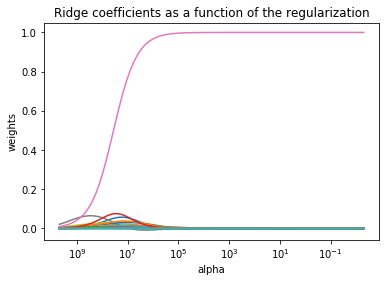

In [37]:
# Initialize values for the alphas
lambdas = 10**np.linspace(10,-2,100)*0.5
print(lambdas.shape)
print(lambdas[0:10])

# Create a Ridge Object that performs ridge regression
# TODO Implement
def ridge_regression(alphas,x,y):
    ridge_model = Ridge(alpha = alphas)
    ridge_model.fit(x,y)
    return ridge_model.coef_

# Create list to hold ridge weights
# TODO Implement
weights = []

# Iterate over all lambdas, performing data fitting with ridge regression 
# and find the corresponding coefficients

#TODO Implement
for alpha in lambdas:
    weights.append(ridge_regression(alpha,features,response))

print(len(weights))
# Generate the plot
# TODO Implement
ax = plt.gca()
ax.plot(lambdas, weights)

ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
#plt.axis('tight')

#ax.set_xscale('log')
#plt.axis('tight')


# Name the plot
# TODO Implement
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
#plt.axis('tight')
#plt.show()

In [32]:
# Now generate the same plot as above using Tensorflow
# for the same set of lambdas


$2$. Next we deal with **L1 regularization** for which the corresponding method is called **Lasso.** In Lasso, we minimize the function, 
$$\mathbf{J(W) ~~=~~ \big|\big|~Y-XW~\big|\big|_{2}^2 ~+~\lambda~ \big|\big|~W~\big|\big|_{1}}$$

**Plot the magnitude of each weight in $\mathbf{W^{Lasso}}$ vs $\mathbf{\lambda}$ and explain how the regularizer $\mathbf{\lambda}$ affects the Lasso weights $\mathbf{W^{Lasso}}$.** $~$ ($2.5$ points)

Text(0.5,1,'Lasso coefficients as a function of the regularization')

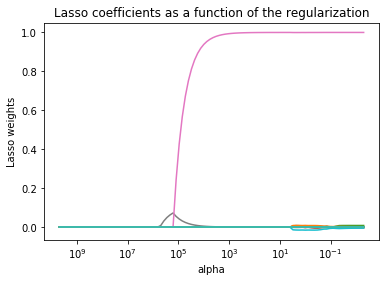

In [39]:
# Create a Lasso Object(set max_iter to 10000)
# TODO Implement
def lasso_reg(alphas,features,response):
    lasso_model = Lasso(alpha=alphas,max_iter = 10000)
    lasso_model.fit(features,response)
    return lasso_model.coef_

# Create list to hold lasso weights
# TODO Implement
Lasso_weights = []

# Iterate over all alphas, performing data fitting with Lasso
# and find the corresponding co-efficients
# TODO Implement
for alpha in lambdas:
    Lasso_weights.append(lasso_reg(alpha,features,response))

# Generate the plot
# TODO Implement
ax = plt.gca()
ax.plot(lambdas, Lasso_weights)

ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
#plt.axis('tight')

# Name the plot
# TODO Implement
plt.xlabel('alpha')
plt.ylabel('Lasso weights')
plt.title('Lasso coefficients as a function of the regularization')

In [34]:
# Now generate the same plot as above using Tensorflow
# for the same set of lambdas

**Comment on the plots generated in problems $1$ and $2$ respectively.**

**Answer:**

From the plots, it is somewhat visible the difference between Ridge Regression ans Lasso. Lasso drives the coefficients to zero (feature selection), where Ridge Regression keeps (usually) all the coefficients (may be almost zero, but still present).

### Understanding the Impact of norms in the  Regularizer $~$ (4 points)

$4$. Assume$~$ $\mathbf{x} \in R^2$, $(x_1, x_2) \in [-1, 1]\times[-1, 1]$. $~$ (2 points)

Now, draw the contour plots for $\mathbf{\big|\big|~x~\big|\big|_{0}}$, $\mathbf{\big|\big|~x~\big|\big|_{1}}$, $\mathbf{\big|\big|~x~\big|\big|_{2}}$ and $\mathbf{\big|\big|~x~\big|\big|_{\infty}}$ norms (consider all possible isolines in the given interval,i.e., ($[-1,1]\times[-1,1]$) and **explain** how you get the corresponding plot, i.e., provide the mathematical formula for getting the outermost isoline in each case.

$5$. Sketch the **Lasso** optimization function, $~$ $\mathbf{J(W) ~~=~~ \big|\big|~Y-XW~\big|\big|_{2}^2 ~+~\lambda~ \big|\big|~W~\big|\big|_{1}}$ $~$ in two dimensions. From this sketch try to explain why **Lasso** induces **sparsity.** $~$ (2 points)

### Getting to know Back-Propagation in details $~$ (3 points)

![Neural Network](https://github.com/mmarius/nnia-tutorial/blob/master/neural-net.png?raw=true)

We have a **Feedforward Neural network** with one **input layer**, one **hidden layer** and one **output layer.** The **hidden layer** and **output layer** use the sigmoid function, $\mathbf{\sigma(x) = \frac{1}{1+exp(-x)}}$, as **activation function.** Also note, that the network minimizes **Binary Cross Entropy loss**, given by, $$\mathbf{J = \sum -y\log(\hat{y}) - (1-y)\log(1-\hat{y})}$$

We consider the true class labels to be **binary**, i.e., either $0$ or $1$. 

**For the purpose of computing the derivatives of the loss/cost function consider the numerical values obtained by the network.**

**Input layer** consists of two nodes, $x_1$ and $x_2$ respectively. For our problem consider the following input,
$$\begin{bmatrix} x_1\\ x_2\\ \end{bmatrix} = \begin{bmatrix} -1\\ 1\\ \end{bmatrix}$$

**Hidden layer** is made up of 3 neurons and the corresponding matrix of weights is as given:
$$
\mathbf{W_{hidden}}
~=~
\begin{bmatrix} w_1^{1} & w_1^{2} & w_1^{3} \\ w_2^{1} & w_2^{2} & w_2^{3} \end{bmatrix}
~=~
\begin{bmatrix} 0.15 & -0.25 & 0.05\\ 0.20 & 0.10 & -0.15 \end{bmatrix}
$$

**Note:** Output of **Hidden layer** is given by, $~~$ $\mathbf{a=\sigma~(W_{hidden}^{T}x)}$

**Output layer** consists of one neuron, i.e., the **network** generates a single output. **For our problem, the true class label is $1$.**

The matrix corresponding to the **Output layer** is given by,
$$
\mathbf{W_{out}}
~=~
\begin{bmatrix} w_1\\w_2 \\w_3\end{bmatrix}
~=~
\begin{bmatrix} 0.20\\-0.35\\0.15 \end{bmatrix}
$$

**Note:** output from the **Output layer** is given by, $~$ $\mathbf{\hat{y} = \sigma~(W_{out}^Ta)}$

$6$. Execute the following sequence of operations and **show that Binary Cross Entropy loss is getting reduced, i.e., $ C^2 < C^1$** $~$ ($3$ points)

**Perform Forward-propagation to generate output** $\to$ **Compute loss or cost ($C^1$)** $\to$ **perform Back-propagation to compute the error** $\to$ **perform Gradient descent to update the weights** $\to$ **peform Forward-propagation again with updated weights** $\to$ **Compute loss or cost ($C^2$)**

**Note:**  $C^i$ denotes the loss or cost at the $i^{th}$ iteration, for performing Gradient descent consider a learning rate of $0.1$

### Feed-forward Neural Network with L1 and L2 regularization $~$ (8 points)

In the following exercise you would build a **feed-forward network** from scratch using only **Numpy** in python. For this, you also have to implement **Back-propagation** in python. Additionally, this network should have the option of **L1 and L2 regularization** enabled within it.

Download **mnist** dataset from NNIA piazza page.

In [35]:
import os
import struct
import numpy as np
 
def load_mnist(path, kind='train'):
    """function for loading data"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape(len(labels), 784)
 
    return images, labels

In [36]:
X_train, y_train = load_mnist('mnist/', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

FileNotFoundError: [Errno 2] No such file or directory: 'mnist/train-labels-idx1-ubyte'

In [ ]:
X_test, y_test = load_mnist('mnist/', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

In [ ]:
import numpy as np
from scipy.special import expit


class MLP(object):
    """ Feedforward neural network with a single hidden layer.

    Parameters
    ------------
    n_output : int
        Number of output units, should be equal to the
        number of unique class labels.
        
    n_features : int
        Number of features (dimensions) in the target dataset.
        Should be equal to the number of columns in the X array.
        
    n_hidden : int
        Number of hidden units.
        
    l1 : float
        Regularizer for L1-regularization.
        l1=0.0 implies no regularization
        
    l2 : float
        Lambda value for L2-regularization.
        l2=0.0 implies no regularization
        
    epochs : int
        Number of passes over the training set.
        
    eta : float (default: 0.001)
        Learning rate.
        
    decrease_const : float (default: 0.0)
        Decrease constant. Shrinks the learning rate
        after each epoch via eta / (1 + epoch*decrease_const)
        
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent circles.
        
    minibatches : int (default: 1)
        Divides training data into k minibatches for efficiency.
        
    random_state : int (default: None)
        Set random state for shuffling and initializing the weights.

    Attributes
    -----------
    cost_ : list
      Sum of squared errors after each epoch.

    """
    def __init__(self, n_output, n_features, n_hidden=30,
                 l1=0.0, l2=0.0, epochs=50, eta=0.001,
                 decrease_const=0.0, shuffle=True,
                 minibatches=1, random_state=None):
        
        #TODO Implement
        


    def encode_labels(self, y, k):
        """Encode the labels using one-hot representation

        Parameters
        ------------
        y : y represents target values.

        Returns
        -----------
        onehot array

        """
        #TODO Implement
        
        

    def initialize_weights(self):
        """Initialize using random numbers."""
        
        #TODO Implement
        

    def sigmoid(self, z):
        """Compute sigmoid function
           Implement a stable version which 
           takes care of overflow and underflow.
        """
        
        #TODO Implement
        
        

    def sigmoid_gradient(self, z):
        """Compute gradient of the sigmoid function"""
        
        #TODO Implement
        
        

    def add_bias_unit(self, X, how='column'):
        """Add bias unit to array at index 0"""
        
        #TODO Implement
        
        

    def feedforward(self, X, w1, w2):
        """Compute feedforward step

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
            Input layer with original features.
        w1 : array, shape = [n_hidden_units, n_features]
            Weight matrix for input layer -> hidden layer.
        w2 : array, shape = [n_output_units, n_hidden_units]
            Weight matrix for hidden layer -> output layer.

        Returns
        ----------
        a1 : array,
            Input values with bias unit.
        z2 : array,
            Net input of hidden layer.
        a2 : array,
            Activation of hidden layer.
        z3 : array,
            Net input of output layer.
        a3 : array,
            Activation of output layer.

        """
        
        # TODO Implement
        
        

    def L2_reg(self, lambda_, w1, w2):
        """Compute L2-regularization cost"""
        
        #TODO Implement
        
        

    def L1_reg(self, lambda_, w1, w2):
        """Compute L1-regularization cost"""
        
        #TODO Implement
        
        
    def get_cost(self, y_enc, output, w1, w2):
        """Compute cost function.

        Parameters
        ----------
        y_enc : array, one-hot encoded class labels.
        
        output : array, Activation of the output layer (feedforward)
        
        w1 : array, Weight matrix for input layer -> hidden layer.
        w2 : array, Weight matrix for hidden layer -> output layer.

        Returns
        ---------
        cost : float, Regularized cost.

        """
        
        #TODO Implement
        
        

    def get_gradient(self, a1, a2, a3, z2, y_enc, w1, w2):
        """ Compute gradient step using backpropagation.

        Parameters
        ------------
        a1 : array, Input values with bias unit.
        a2 : array, Activation of hidden layer.
        a3 : array, Activation of output layer.
        z2 : array, Net input of hidden layer.
        y_enc : array, one-hot encoded class labels.
        w1 : array, Weight matrix for input layer -> hidden layer.
        w2 : array, Weight matrix for hidden layer -> output layer.

        Returns
        ---------
        grad1 : array, Gradient of the weight matrix w1.
        grad2 : array, Gradient of the weight matrix w2.

        """
        
        # backpropagation
        #TODO Implement
        
        

        # regularize
        #TODO Implement
        
        

    def predict(self, X):
        """Predict class labels

        Parameters
        -----------
        X : array, Input layer with original features.

        Returns:
        ----------
        y_pred : array, Predicted class labels.

        """
        
        # TODO Implement
        
        
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data.

        Parameters
        -----------
        X : array, Input layer with original features.
        y : array, Target class labels.
        print_progress : bool, Prints the progress

        Returns:
        ----------
        self

        """
        
        #TODO Implement
        
        

In [ ]:
nn = MLP(n_output=10, 
                  n_features=X_train.shape[1], 
                  n_hidden=50, 
                  l2=0.1, 
                  l1=0.0, 
                  epochs=1000, 
                  eta=0.001,
                  decrease_const=0.00001,
                  minibatches=50, 
                  shuffle=True,
                  random_state=1)

In [ ]:
nn.fit(X_train, y_train, print_progress=True)

In [ ]:
import matplotlib.pyplot as plt

# Plot the training error for every iteration
# in every epoch

# TODO Implement

plt.tight_layout()
plt.show()

In [ ]:
# Plot the training error in every epoch
# TODO Implement

plt.tight_layout()
plt.show()

In [ ]:
# Compute Training Accuracy
# TODO Implement

print('Training accuracy: %.2f%%' % (acc * 100))

In [ ]:
# Compute Test Accuracy
# TODO Implement

print('Test accuracy: %.2f%%' % (acc * 100))